In [1]:
import pandas as pd

In [2]:
# how often does a 20 beat a dealer with a 5 when dealer hits on soft 17
import blackjack_utils.game_config as gc
import blackjack_utils.shoe as shoe
import blackjack_utils.card as card
import random

# create a shoe with 6 decks
deck = shoe.Shoe(6)
player_cards = [card.Card().from_ints(11, 0), card.Card().from_ints(9, 0)]
dealer_card_up = card.Card().from_ints(3, 0)
deck.remove(player_cards[0])
deck.remove(player_cards[1])
deck.remove(dealer_card_up)
game_config = gc.GameConfig(6, True, True, True, 1.5)
results = []
for i in range(100000):
    deck_copy = shoe.Shoe(6)
    deck_copy.cards = deck.cards.copy()
    deck_copy.shuffle()
    dealer_cards = [dealer_card_up, deck_copy.draw()]
    result = game_config.evaluate(player_cards, dealer_cards, deck_copy)
    results.append(result)


In [3]:
mean = sum(results) / len(results)
print(mean) # 0.67191 - interpretation: expected value is + 0.67 - you profit 67% of your bet on average

0.66765


In [4]:
# now what happens when the player stays on 17 vs an 8
deck = shoe.Shoe(6)
player_cards = [card.Card().from_ints(11, 0), card.Card().from_ints(5, 0)]
dealer_card_up = card.Card().from_ints(6, 0)
deck.remove(player_cards[0])
deck.remove(player_cards[1])
deck.remove(dealer_card_up)
game_config = gc.GameConfig(6, True, True, True, 1.5)
results = []
for i in range(100000):
    deck_copy = shoe.Shoe(6)
    deck_copy.cards = deck.cards.copy()
    deck_copy.shuffle()
    dealer_cards = [dealer_card_up, deck_copy.draw()]
    result = game_config.evaluate(player_cards, dealer_cards, deck_copy)
    results.append(result)


In [5]:
mean = sum(results) / len(results)
print(mean) # -0.38408 - interpretation: expected value is -0.38408 - you lose 38% of your bet on average

-0.38675


In [ ]:
# gives a breakdown of the EV when a player stands on 17 vs different dealer cards
data = pd.DataFrame(columns=['player_total', 'dealer_card_up', 'expected_value'])
player_cards = [card.Card().from_ints(11, 0), card.Card().from_ints(5, 0)]

game_config = gc.GameConfig(6, True, True, True, 1.5)
for i in list(range(9)) + [12]:
    dealer_card_up = card.Card().from_ints(i, 0)
    deck = shoe.Shoe(6)
    deck.remove(player_cards[0])
    deck.remove(player_cards[1])
    deck.remove(dealer_card_up)
    results = []
    for i in range(40000):
        deck_copy = shoe.Shoe(6)
        deck_copy.cards = deck.cards.copy()
        deck_copy.shuffle()
        dealer_cards = [dealer_card_up, deck_copy.draw()]
        result = game_config.evaluate(player_cards, dealer_cards, deck_copy)
        results.append(result)

    mean = sum(results) / len(results)
    data = pd.concat([data, pd.DataFrame({'player_total': [game_config.score_hand(player_cards)], 'dealer_card_up': [dealer_card_up.get_card_value()], 'expected_value': [mean]})], ignore_index=True)
data

C:\Users\amarl\AppData\Local\Temp\ipykernel_23372\896386972.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, pd.DataFrame({'player_total': [game_config.score_hand(player_cards)], 'dealer_card_up': [dealer_card_up.get_card_value()], 'expected_value': [mean]})], ignore_index=True)


,player_total,dealer_card_up,expected_value
0,17,2,-0.157150
1,17,3,-0.114375
2,17,4,-0.086575
3,17,5,-0.045950
4,17,6,-0.011725
5,17,7,-0.107300
6,17,8,-0.387650
7,17,9,-0.419225
8,17,10,-0.456475
9,17,11,-0.662075


In [11]:
# next up - use logic similar to the above to determine what the player should do in any given situation
# start with player has 20 vs each possible dealer card up, analyze the options (hit, stay, double down)
# with lower player totals, if a player hits, use the prescribed action after the hit for the new higher total
# will have to do a second pass to figure out when to split and what to do with soft totals
# this should give us the basic strategy table. check if it matches what the pros say

# gives a breakdown of the EV when a player stands, hits, or doubles on hard 20 vs different dealer cards
data = pd.DataFrame(columns=['player_total', 'action', 'dealer_card_up', 'expected_value'])
player_cards = [card.Card().from_ints(11, 0), card.Card().from_ints(10, 0)]

game_config = gc.GameConfig(6, True, True, True, 1.5)
# stand 
for i in list(range(9)) + [12]:
    dealer_card_up = card.Card().from_ints(i, 0)
    deck = shoe.Shoe(6)
    deck.remove(player_cards[0])
    deck.remove(player_cards[1])
    deck.remove(dealer_card_up)
    results = []
    for i in range(40000):
        deck_copy = shoe.Shoe(6)
        deck_copy.cards = deck.cards.copy()
        deck_copy.shuffle()
        dealer_cards = [dealer_card_up, deck_copy.draw()]
        result = game_config.evaluate(player_cards, dealer_cards, deck_copy)
        results.append(result)

    mean = sum(results) / len(results)
    data = pd.concat([data, pd.DataFrame({'player_total': [game_config.score_hand(player_cards)], 'action': ['stand'], 'dealer_card_up': [dealer_card_up.get_card_value()], 'expected_value': [mean]})], ignore_index=True)
# hit/double 
for i in list(range(9)) + [12]:
    dealer_card_up = card.Card().from_ints(i, 0)
    deck = shoe.Shoe(6)
    deck.remove(player_cards[0])
    deck.remove(player_cards[1])
    deck.remove(dealer_card_up)
    results = []
    results_double = []
    for i in range(40000):
        deck_copy = shoe.Shoe(6)
        deck_copy.cards = deck.cards.copy()
        deck_copy.shuffle()
        dealer_cards = [dealer_card_up, deck_copy.draw()]
        player_cards_copy = player_cards.copy()
        player_cards_copy.append(deck_copy.draw())
        result = game_config.evaluate(player_cards_copy, dealer_cards, deck_copy)
        results.append(result)
        results_double.append(result * 2)

    mean = sum(results) / len(results)
    mean_double = sum(results_double) / len(results_double)
    data = pd.concat([data, pd.DataFrame({'player_total': [game_config.score_hand(player_cards)], 'action': ['hit'], 'dealer_card_up': [dealer_card_up.get_card_value()], 'expected_value': [mean]})], ignore_index=True)
    data = pd.concat([data, pd.DataFrame({'player_total': [game_config.score_hand(player_cards)], 'action': ['double'], 'dealer_card_up': [dealer_card_up.get_card_value()], 'expected_value': [mean_double]})], ignore_index=True)
data.sort_values(by=['player_total', 'dealer_card_up', 'action'])

C:\Users\amarl\AppData\Local\Temp\ipykernel_23372\4172874134.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, pd.DataFrame({'player_total': [game_config.score_hand(player_cards)], 'action': ['stand'], 'dealer_card_up': [dealer_card_up.get_card_value()], 'expected_value': [mean]})], ignore_index=True)


,player_total,action,dealer_card_up,expected_value
11,20,double,2,-1.706300
10,20,hit,2,-0.853150
0,20,stand,2,0.633600
13,20,double,3,-1.708750
12,20,hit,3,-0.854375
1,20,stand,3,0.638300
15,20,double,4,-1.713300
14,20,hit,4,-0.856650
2,20,stand,4,0.651275
17,20,double,5,-1.698050


In [2]:
# data.to_csv('action_expected_values.csv')
data = pd.read_csv('action_expected_values.csv')

In [8]:
data['player_total'] = data['player_total'].astype(str)
data['dealer_card_up'] = data['dealer_card_up'].astype(str)
data_pivoted = data.pivot(index=['player_total', 'dealer_card_up'], columns='action', values='expected_value')
data_pivoted['player_total'] = data_pivoted.index.get_level_values(0)
data_pivoted['dealer_card_up'] = data_pivoted.index.get_level_values(1)
data_pivoted.reset_index(drop=True, inplace=True)
data_pivoted

action,double,hit,stand,player_total,dealer_card_up
0,-1.71045,-0.855225,0.434475,20,10
1,-1.75510,-0.877550,0.107125,20,11
2,-1.70630,-0.853150,0.633600,20,2
3,-1.70875,-0.854375,0.638300,20,3
4,-1.71330,-0.856650,0.651275,20,4
5,-1.69805,-0.849025,0.669850,20,5
6,-1.70505,-0.852525,0.676675,20,6
7,-1.68630,-0.843150,0.770050,20,7
8,-1.69890,-0.849450,0.788125,20,8
9,-1.69345,-0.846725,0.756425,20,9


In [9]:
def determine_best_action(row: pd.Series) -> pd.DataFrame:
    if row['double'] > row['hit'] and row['double'] > row['stand']:
        return 'double'
    elif row['hit'] > row['stand']:
        return 'hit'
    else:
        return 'stand'
    
def action_expected_values_to_best_action(data: pd.DataFrame) -> pd.DataFrame:
    data['player_total'] = data['player_total'].astype(str)
    data['dealer_card_up'] = data['dealer_card_up'].astype(str)
    data_pivoted = data.pivot(index=['player_total', 'dealer_card_up'], columns='action', values='expected_value')
    data_pivoted['player_total'] = data_pivoted.index.get_level_values(0)
    data_pivoted['dealer_card_up'] = data_pivoted.index.get_level_values(1)
    data_pivoted.reset_index(drop=True, inplace=True)
    data_pivoted['best_action'] = data_pivoted.apply(determine_best_action, axis=1)
    return data_pivoted

In [11]:
data = action_expected_values_to_best_action(data)

In [16]:
# enumerate the ways to make each hand with starting cards
from blackjack_utils.deck import Deck
from blackjack_utils.card import Card
combos = {}
for i in range(2, 22):
    combos[str(i)] = []
for i in range(12, 21):
    combos[f"soft_{i}"] = []
for i in range(2, 21, 2):
    combos[f'paired_{i}'] = []
deck_1 = Deck()
deck_2 = Deck()
for card_1 in deck_1.cards:
    for card_2 in deck_2.cards:
        total = card_1.get_card_value() + card_2.get_card_value()
        if total == 22:
            total = 12
        combos[str(total)].append((card_1, card_2))
        if card_1.get_card_value() == card_2.get_card_value():
            combos[f'paired_{total}'].append((card_1, card_2))
        if (card_1.get_card_value() == 11 or card_2.get_card_value() == 11) and total < 21:
            combos[f'soft_{total}'].append((card_1, card_2))
    

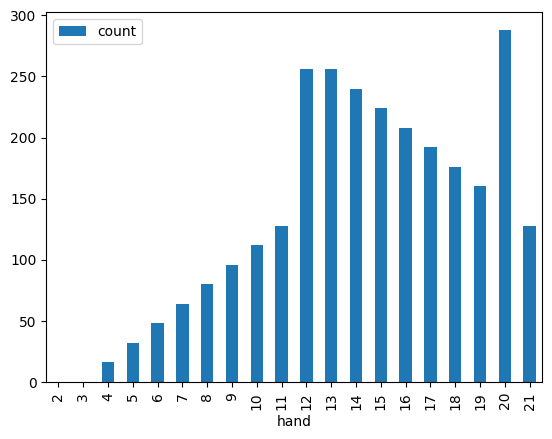

In [18]:
import matplotlib.pyplot as plt
#check out the number of ways to make each hand
hand_distributions = pd.DataFrame(columns=['hand', 'count'])

for i in range(2, 22):
    hand_distributions = pd.concat([hand_distributions, pd.DataFrame({'hand': [str(i)], 'count': [len(combos[str(i)])]})], ignore_index=True)
    
hand_distributions.plot.bar(x='hand', y='count')
plt.show()

In [17]:
combos

{'2': [],
 '3': [],
 '4': [(<blackjack_utils.card.Card at 0x1aad4a2fa00>,
   <blackjack_utils.card.Card at 0x1aad4bfdae0>),
  (<blackjack_utils.card.Card at 0x1aad4a2fa00>,
   <blackjack_utils.card.Card at 0x1aad4bff7c0>),
  (<blackjack_utils.card.Card at 0x1aad4a2fa00>,
   <blackjack_utils.card.Card at 0x1aad4bfddb0>),
  (<blackjack_utils.card.Card at 0x1aad4a2fa00>,
   <blackjack_utils.card.Card at 0x1aab47d5a20>),
  (<blackjack_utils.card.Card at 0x1aad4a434f0>,
   <blackjack_utils.card.Card at 0x1aad4bfdae0>),
  (<blackjack_utils.card.Card at 0x1aad4a434f0>,
   <blackjack_utils.card.Card at 0x1aad4bff7c0>),
  (<blackjack_utils.card.Card at 0x1aad4a434f0>,
   <blackjack_utils.card.Card at 0x1aad4bfddb0>),
  (<blackjack_utils.card.Card at 0x1aad4a434f0>,
   <blackjack_utils.card.Card at 0x1aab47d5a20>),
  (<blackjack_utils.card.Card at 0x1aad4a435b0>,
   <blackjack_utils.card.Card at 0x1aad4bfdae0>),
  (<blackjack_utils.card.Card at 0x1aad4a435b0>,
   <blackjack_utils.card.Card at 0x

In [ ]:
def simulate_hand(game_config: gc.GameConfig, player_cards: List[card.Card], dealer_cards: List[card.Card], deck: shoe.Shoe):

In [16]:
import pandas as pd

df = pd.DataFrame({'A': ['foo', 'foo', 'bar', 'bar'],
        'B': ['one', 'two', 'one', 'two'],
        'C': ['x', 'y', 'x', 'y'],
        'D': [1, 2, 3, 4]})

# Set multi-index and pivot
pivoted_df = df.set_index(['A', 'B', 'C']).unstack('C')
print(pivoted_df)

           D     
C          x    y
A   B            
bar one  3.0  NaN
    two  NaN  4.0
foo one  1.0  NaN
    two  NaN  2.0
